<a href="https://colab.research.google.com/github/yash-clear/Web-Scrapping-and-Machine-Learning/blob/main/kepler_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Problem 2

Given a list of planets discovered by KEPLER.

Kepler Data: https://drive.google.com/drive/folders/1GwqC4STc_KgVPofacQUzKHBMHQsmflvY?usp=sharing

###Create an ML algorithm to classify the planets as Candidate/False positive/Confirmed etc based on the  column “koi_disposition”.





In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn import model_selection, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
df = pd.read_csv('/content/gdrive/MyDrive/datasets/Webscraping and Machine learning/kepler_data.csv', skiprows = 52)
df


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [35]:
df = df.drop(columns = ['kepid', 'kepoi_name', 'kepler_name','koi_teq_err1', 'koi_teq_err2','koi_tce_delivname' ])

In [36]:
df.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [37]:
new_df = df[['koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_disposition']]

In [38]:
new_df.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disposition
0,CANDIDATE,1.000,0,0,0,0,CONFIRMED
1,CANDIDATE,0.969,0,0,0,0,CONFIRMED
2,CANDIDATE,0.000,0,0,0,0,CANDIDATE
3,FALSE POSITIVE,0.000,0,1,0,0,FALSE POSITIVE
4,CANDIDATE,1.000,0,0,0,0,CONFIRMED


In [39]:
label_encoder = preprocessing.LabelEncoder()
new_df['koi_pdisposition']= label_encoder.fit_transform(new_df['koi_pdisposition'])
new_df['koi_disposition']= label_encoder.fit_transform(new_df['koi_disposition'])
new_df

<ipython-input-39-57f4fd5618d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['koi_pdisposition']= label_encoder.fit_transform(new_df['koi_pdisposition'])
<ipython-input-39-57f4fd5618d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['koi_disposition']= label_encoder.fit_transform(new_df['koi_disposition'])


,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disposition
0,0,1.000,0,0,0,0,1
1,0,0.969,0,0,0,0,1
2,0,0.000,0,0,0,0,0
3,1,0.000,0,1,0,0,2
4,0,1.000,0,0,0,0,1
...,...,...,...,...,...,...,...
9559,1,0.000,0,1,1,0,2
9560,0,0.497,0,0,0,0,0
9561,1,0.021,0,0,1,0,2
9562,0,0.092,0,0,0,0,0


In [40]:
new_df.isnull().sum()

koi_pdisposition       0
koi_score           1510
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_disposition        0
dtype: int64

In [41]:
# dropping rows with null value
new_df.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


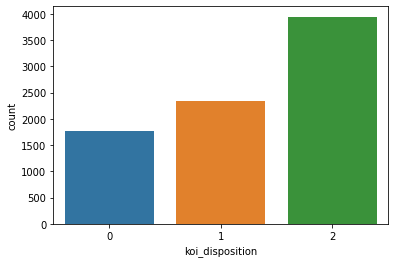

In [42]:
sns.countplot(x='koi_disposition', data=new_df)

In [43]:
y = new_df['koi_disposition']
x = new_df.drop(['koi_disposition'], axis = 1)
x.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
0,0,1.000,0,0,0,0
1,0,0.969,0,0,0,0
2,0,0.000,0,0,0,0
3,1,0.000,0,1,0,0
4,0,1.000,0,0,0,0


In [44]:

scaler = StandardScaler()
X = scaler.fit_transform(x)
# y =y.tolist()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
all_models = {
    "xgb_model":XGBClassifier(eval_metric = "logloss",random_state=1),
    "rf_model":RandomForestClassifier(random_state = 1),
    "logistic_model":LogisticRegression(),
    "svm_model":SVC(),
    "ada_model":AdaBoostClassifier(RandomForestClassifier(random_state = 1))
}

for model_name in all_models:
    print(f"Model Name: {model_name}")
    cv_score = cross_val_score(all_models[model_name],X, y, cv = 5)
    print(cv_score)
    print(f"Mean Score: {np.mean(cv_score)}")
    print()

Model Name: xgb_model
[0.8069522  0.82557418 0.8547486  0.87212911 0.8484472 ]
Mean Score: 0.8415702603606418

Model Name: rf_model
[0.80819367 0.81440099 0.83240223 0.8566108  0.82981366]
Mean Score: 0.8282842723357661

Model Name: logistic_model
[0.79702048 0.80012415 0.81440099 0.84109249 0.8552795 ]
Mean Score: 0.8215835232157798

Model Name: svm_model
[0.79764122 0.80446927 0.82433271 0.84729981 0.85714286]
Mean Score: 0.8261771747805267

Model Name: ada_model
[0.80198634 0.81440099 0.8355059  0.8566108  0.8310559 ]
Mean Score: 0.8279119870764273



In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train Data: {X_train.shape}. {y_train.shape}")
print(f"Vaild Data: {X_test.shape}. {y_test.shape}")

Train Data: (6443, 6). (6443,)
Vaild Data: (1611, 6). (1611,)


On Train Data
Accuracy: 0.8250814837808474
F1 Score: 0.8250814837808474
Precision: 0.8250814837808474
Recall: 0.8250814837808474


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


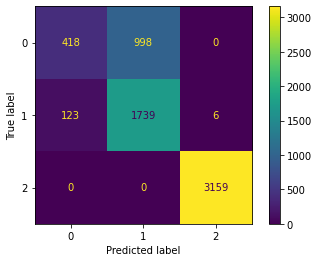

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8330229671011794
F1 Score: 0.8330229671011794
Precision: 0.8330229671011794
Recall: 0.8330229671011794


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


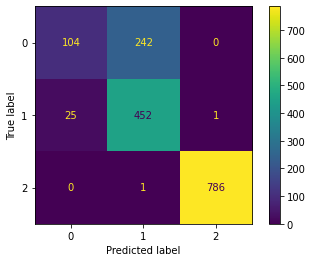

In [47]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("On Train Data")
predictions = svm_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(svm_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

print()


In [48]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
grid.fit(X_train, y_train)

print("Best Params:",grid.best_params_)
print("Best Estimator", grid.best_estimator_)

Best Params: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Estimator SVC(C=1000, gamma=1)


On Train Data
Accuracy: 0.8283408350147446
F1 Score: 0.8283408350147446
Precision: 0.8283408350147446
Recall: 0.8283408350147446


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


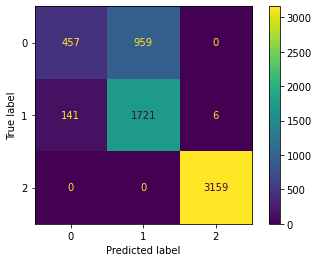

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8342644320297952
F1 Score: 0.8342644320297951
Precision: 0.8342644320297952
Recall: 0.8342644320297952


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


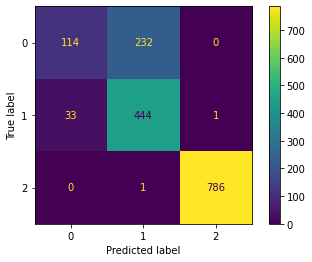

In [49]:
svm_model = SVC(C=1000, gamma=0.01)
svm_model.fit(X_train, y_train)

print("On Train Data")
predictions = svm_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(svm_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

print()


On Train Data
Accuracy: 0.861710383361788
F1 Score: 0.861710383361788
Precision: 0.861710383361788
Recall: 0.861710383361788


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


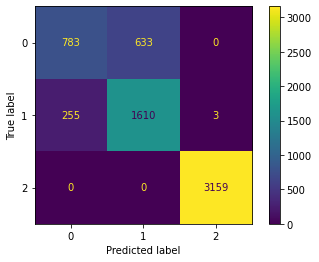

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.824332712600869
F1 Score: 0.824332712600869
Precision: 0.824332712600869
Recall: 0.824332712600869


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


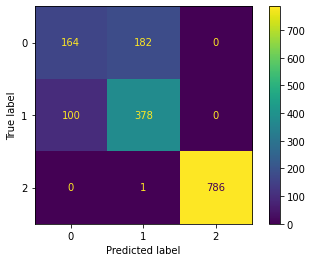

In [50]:
rf_model = RandomForestClassifier(random_state = 18)
rf_model.fit(X_train, y_train)
print("On Train Data")
predictions = rf_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(rf_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

print()




In [51]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state = 24)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=24, n_jobs = -1)
rf_random.fit(X_train, y_train)

print("Best Params:",rf_random.best_params_)
print("Best Estimator", rf_random.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best Estimator RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=1200, random_state=24)


On Train Data
Accuracy: 0.8570541673133634
F1 Score: 0.8570541673133634
Precision: 0.8570541673133634
Recall: 0.8570541673133634


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


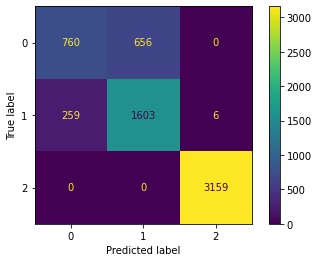

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8324022346368715
F1 Score: 0.8324022346368715
Precision: 0.8324022346368715
Recall: 0.8324022346368715


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


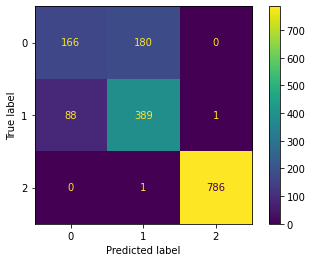

In [52]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, random_state=24)
rf_model.fit(X_train, y_train)



print("On Train Data")
predictions = rf_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(rf_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()

print()


On Train Data
Accuracy: 0.8441719695793884
F1 Score: 0.8441719695793884
Precision: 0.8441719695793884
Recall: 0.8441719695793884


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


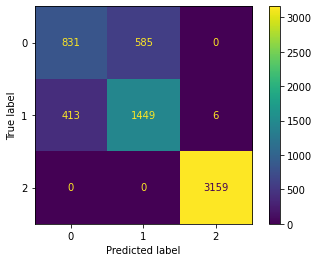

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8392302917442582
F1 Score: 0.8392302917442583
Precision: 0.8392302917442582
Recall: 0.8392302917442582


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


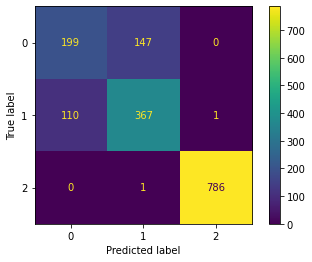

In [53]:
xgb_model = XGBClassifier(random_state = 18)
xgb_model.fit(X_train, y_train)


print("On Train Data")
predictions = xgb_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(xgb_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(xgb_model, X_test, y_test)
plt.show()

print()



On Train Data
Accuracy: 0.7884525841999068
F1 Score: 0.7884525841999068
Precision: 0.7884525841999068
Recall: 0.7884525841999068


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


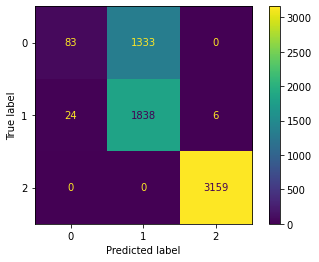

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.792675356921167
F1 Score: 0.792675356921167
Precision: 0.792675356921167
Recall: 0.792675356921167


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


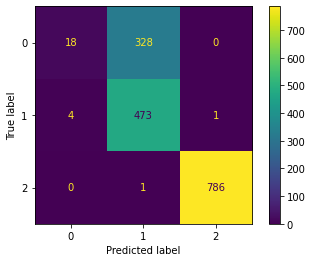

In [54]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

print("On Train Data")
predictions = ada_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(ada_model, X_train, y_train)
plt.show()
print('_'*100)

print("On Test Data")
predictions = ada_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(ada_model, X_test, y_test)
plt.show()

print()



On Train Data
Accuracy: 0.8505354648455689
F1 Score: 0.8505354648455689
Precision: 0.8505354648455689
Recall: 0.8505354648455689


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


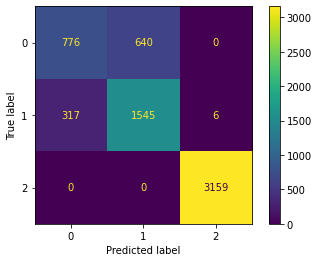

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8367473618870267
F1 Score: 0.8367473618870267
Precision: 0.8367473618870267
Recall: 0.8367473618870267


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


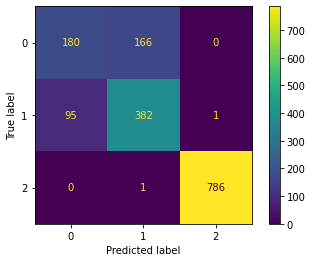

In [55]:
best_model = VotingClassifier(
    [
        ("rf_model", RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, random_state=24)),
        ("xgb_model", XGBClassifier(eval_metric="logloss", random_state = 18)),
        ("svm_model", SVC(C=1000, gamma=0.01))
    ]
)

best_model.fit(X_train, y_train)

print("On Train Data")
predictions = best_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(best_model, X_train, y_train)
plt.show()

print('_'*100)

print("On Test Data")
predictions = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(best_model, X_test, y_test)
plt.show()


On Train Data
Accuracy: 0.8572093745149775
F1 Score: 0.8572093745149775
Precision: 0.8572093745149775
Recall: 0.8572093745149775


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


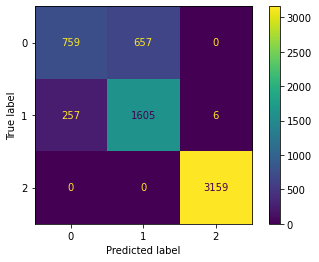

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8317815021725636
F1 Score: 0.8317815021725636
Precision: 0.8317815021725636
Recall: 0.8317815021725636


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


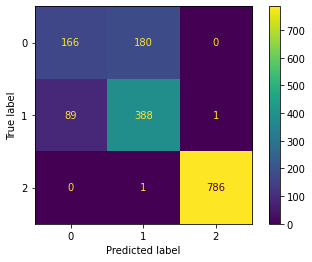

In [56]:
best_model = VotingClassifier(
    [
        ("rf_model", RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, random_state=24)),
        ("xgb_model", XGBClassifier(eval_metric="logloss",random_state = 18)),
        ("ada_model", AdaBoostClassifier())
    ]
)

best_model.fit(X_train, y_train)

print("On Train Data")
predictions = best_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(best_model, X_train, y_train)
plt.show()
print('_'*100)
print("On Test Data")
predictions = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(best_model, X_test, y_test)
plt.show()


In [57]:
final_model = VotingClassifier(
    [
        ("rf_model", RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600, random_state=24)),
        ("xgb_model", XGBClassifier(eval_metric="logloss", random_state = 18)),
        ("svm_model", SVC(C=1000, gamma=0.01))
    ]
)

final_model.fit(X, y)

VotingClassifier(estimators=[('rf_model',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=80,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=600,
                                                     random_state=24)),
                             ('xgb_model',
                              XGBClassifier(eval_metric='logloss',
                                            random_state=18)),
                             ('svm_model', SVC(C=1000, gamma=0.01))])

On Train Data
Accuracy: 0.8570541673133634
F1 Score: 0.8570541673133634
Precision: 0.8570541673133634
Recall: 0.8570541673133634


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


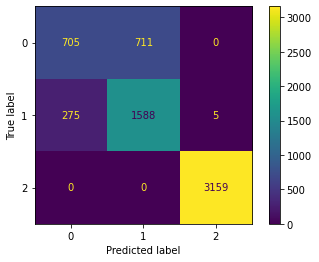

____________________________________________________________________________________________________
On Test Data
Accuracy: 0.8590937306021105
F1 Score: 0.8590937306021105
Precision: 0.8590937306021105
Recall: 0.8590937306021105


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


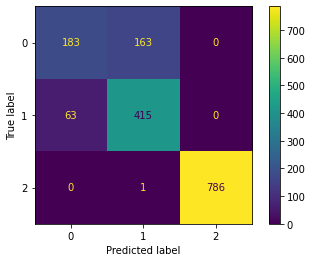

In [58]:

print("On Train Data")
predictions = final_model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")
print(f"F1 Score: {f1_score(y_train, predictions, average='micro')}")
print(f"Precision: {precision_score(y_train, predictions, average='micro')}")
print(f"Recall: {recall_score(y_train, predictions, average='micro')}")
plot_confusion_matrix(final_model, X_train, y_train)
plt.show()
print('_'*100)
print("On Test Data")
predictions = final_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions,average='micro')}")
print(f"Precision: {precision_score(y_test, predictions,average='micro')}")
print(f"Recall: {recall_score(y_test, predictions,average='micro')}")
plot_confusion_matrix(final_model, X_test, y_test)
plt.show()
